# Project: Investigate a Movie Database (TMDb) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The **Movie Database (TMDb)**, including user ratings and revenue.

**Interested questions**:
1. How does movie production change over years?
2. What is the distribution of movie released in differnt month?
3. What's the relationship among popurality, budget, revenues and runtime?
4. What's the distribution of runtime?
5. Who directed the most movies?
6. Which genres are most popular from year to year? 
7. Which genres are associated with movie that has the highest revenues?


In [150]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [12]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/tmdb-movies.csv', encoding = "ISO-8859-1")
# encoding = "ISO-8859-1" here is to solve the problem "UnicodeDecodeError when reading CSV file in Pandas with Python"

In [15]:
# print out the first 3 lines to see what contains in the file.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08


In [16]:
# Get the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

- From the given info we can see that there should be 10866 entries, but for some columns, the entries is less than 10866, which means there is **NA** data;
- We can also see from the info that for the different columns, the data types are different, this should be kept in mind when doing the data wrangling. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

- After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.


In [41]:
# Generate a new csv file named "interested_data.csv" which only contains columns that I am interested in
headers=['id','original_title','popularity','cast','director','runtime','genres','release_date','vote_count','budget_adj','revenue_adj']
df.to_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/interested_data.csv', columns = headers, index=False)

In [42]:
# Read new "interested_data.csv" file
df_new = pd.read_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/interested_data.csv')

In [43]:
# print out the first line to see what contains in the file.
df_new.head(1)

,id,original_title,popularity,cast,director,runtime,genres,release_date,vote_count,budget_adj,revenue_adj
0,135397,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,137999939.3,1.392446e+09


In [44]:
# Get the information about the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
original_title    10866 non-null object
popularity        10866 non-null float64
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 933.9+ KB


In [67]:
# Use DataFrame methods 'dropna()' to remove missing values.
df_new['cast'].replace(' ', np.nan, inplace=True)
df_new.dropna()
df_new.to_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/interested_data.csv', columns = headers, index=False)


In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
original_title    10866 non-null object
popularity        10866 non-null float64
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 933.9+ KB


- From the info we can see that column 'cast, director, and genres' have empty value, we should fill them with nan and than drop the null cells.

In [84]:
# Fill empty cells with NaN
df_new['cast']=df_new['cast'].fillna(np.nan)
df_new['director'] = df_new['director'].fillna(np.nan)
df_new['genres'] = df_new['genres'].fillna(np.nan)

In [89]:
# Removing the features that have an missing values. Use dropna() to removing missing values.
df_new.dropna()

,id,original_title,popularity,cast,director,runtime,genres,release_date,vote_count,budget_adj,revenue_adj
0,135397,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,1.379999e+08,3.481613e+08
2,262500,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,1.012000e+08,2.716190e+08
3,140607,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,1.839999e+08,1.902723e+09
4,168259,Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,1.747999e+08,1.385749e+09
5,281957,The Revenant,9.110700,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÌÄåÁlez IÌÄå±ÌÄåÁrritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,1.241999e+08,4.903142e+08
6,87101,Terminator Genisys,8.654359,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,1.425999e+08,4.053551e+08
7,286217,The Martian,7.667400,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,9.935996e+07,5.477497e+08
8,211672,Minions,7.404165,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.807997e+07,1.064192e+09
9,150540,Inside Out,6.326804,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,1.609999e+08,7.854116e+08


In [ ]:
# Split the genres column to list 
def split_pipe_symbol(genre):
    return genre.split("|")
def split_pipe_symbols(genre):
    return genre.apply(split_pipe_symbol)
df_new['genres'] = split_pipe_symbols(genres)

In [94]:
# Split the cast column to list 
casts = df_new['cast']
def split_cast(cast):
    return cast.split("|")
def split_casts(cast):
    return cast.apply(split_cast)
df_new['cast'] = split_casts(casts)

In [98]:
# Parse the release date to three new individual day, month and year column
df_new['release_date'] = pd.to_datetime(df_new['release_date'], format = '%m/%d/%y')
df_new['release_day'] = df_new['release_date'].dt.day
df_new['release_month']=df_new['release_date'].dt.month
df_new['release_year']=df_new['release_date'].dt.year
del df_new['release_date']

In [100]:
# print out the first line to see how does the dataframe looks like now
df_new.head(1)

,id,original_title,popularity,cast,director,runtime,genres,vote_count,budget_adj,revenue_adj,release_day,release_month,release_year
0,135397,Jurassic World,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",5562,137999939.3,1.392446e+09,9,6,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1: How does movie production change over years?¶

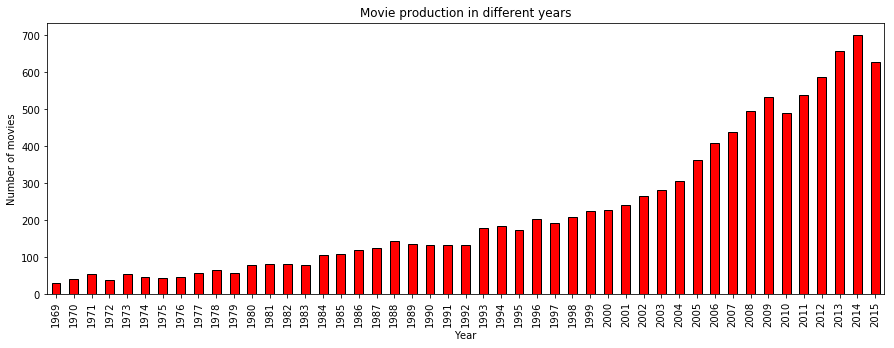

In [102]:
# don't consider the data after year 2017, which are unrealistic values
df_filter = df_new.query('release_year<=2017')
number_of_movie_in_year = df_filter.groupby('release_year').count()['release_month']
number_of_movie_in_year.plot(kind='bar',color = 'red',edgecolor='black',figsize = (15,5))
plt.xlabel('Year')
plt.ylabel("Number of movies")
plt.title('Movie production in different years');

In [103]:
number_of_movie_in_year.describe()

count     47.000000
mean     224.148936
std      191.035619
min       31.000000
25%       79.000000
50%      145.000000
75%      294.000000
max      700.000000
Name: release_month, dtype: float64

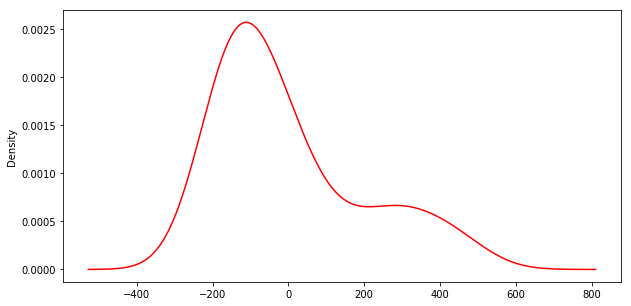

In [107]:
diff = number_of_movie_in_year - number_of_movie_in_year.mean()
diff.plot(kind='kde',color='red',figsize=(10,5))
plt.title("Kernel Density of Difference in movie number");

#### Answers:
- From the figures above we can see that in general, there is a upward trend for movie production;
- There is around 224 movies produced every year;
- Year 2014 has the highest production which has 700 movies within that year;
- From the Kernel density figure, we can see that most of the values are negative, which means that in the earlier years, movie production numbers are less than the mean production number over all years.

### Q2:  What is the distribution of movie released in differnt month?

In [109]:
distribution_in_month = df_filter.groupby(['release_month']).count()['release_day']
distribution_in_month.describe()

count      12.000000
mean      877.916667
std       174.846664
min       675.000000
25%       780.250000
50%       797.500000
75%       908.250000
max      1310.000000
Name: release_day, dtype: float64

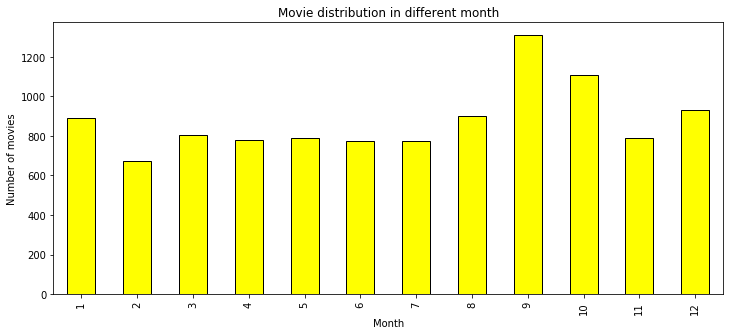

In [110]:
distribution_in_month.plot(kind='bar',color = 'yellow',edgecolor = 'black',figsize = (12,5))
plt.xlabel('Month')
plt.ylabel("Number of movies")
plt.title('Movie distribution in different month');

In [160]:
labels = 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'  
y = distribution_in_month.values.tolist() # change the dataframe to list 
print (y)
total = sum(y)
Y = [] 
for i in y:
    persent = (i / total)
    Y.append(persent)
print (Y)

[892, 675, 803, 782, 790, 775, 775, 901, 1310, 1110, 792, 930]
[0.0846701471286189, 0.06407214048410062, 0.07622211675367821, 0.07422876127195065, 0.07498813478879925, 0.07356430944470811, 0.07356430944470811, 0.08552444233507356, 0.12434741338395823, 0.10536307546274323, 0.07517797816801139, 0.08827717133364973]


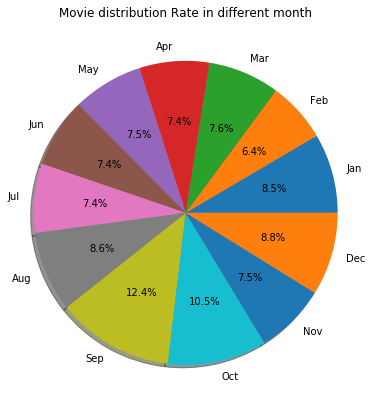

In [182]:
plt.pie(Y, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Movie distribution Rate in different month')
fig = plt.gcf()
fig.set_size_inches(6,7)
plt.show();

#### Answer
- From the figure above, we can clearly see that mostly movies are released in September and October, and September has the largest number which is 12.4% over the year; Movie released in Feburary has the smallest percentage which is 6.4%.

### Q3:  What's the relationship among popurality, budget, revenues and runtime?

In [184]:
popularity = df_new['popularity']
budget = df_new['budget_adj']
revenues = df_new['revenue_adj']
runtime = df_new['runtime']
scaled_budget = (budget/budget.std())

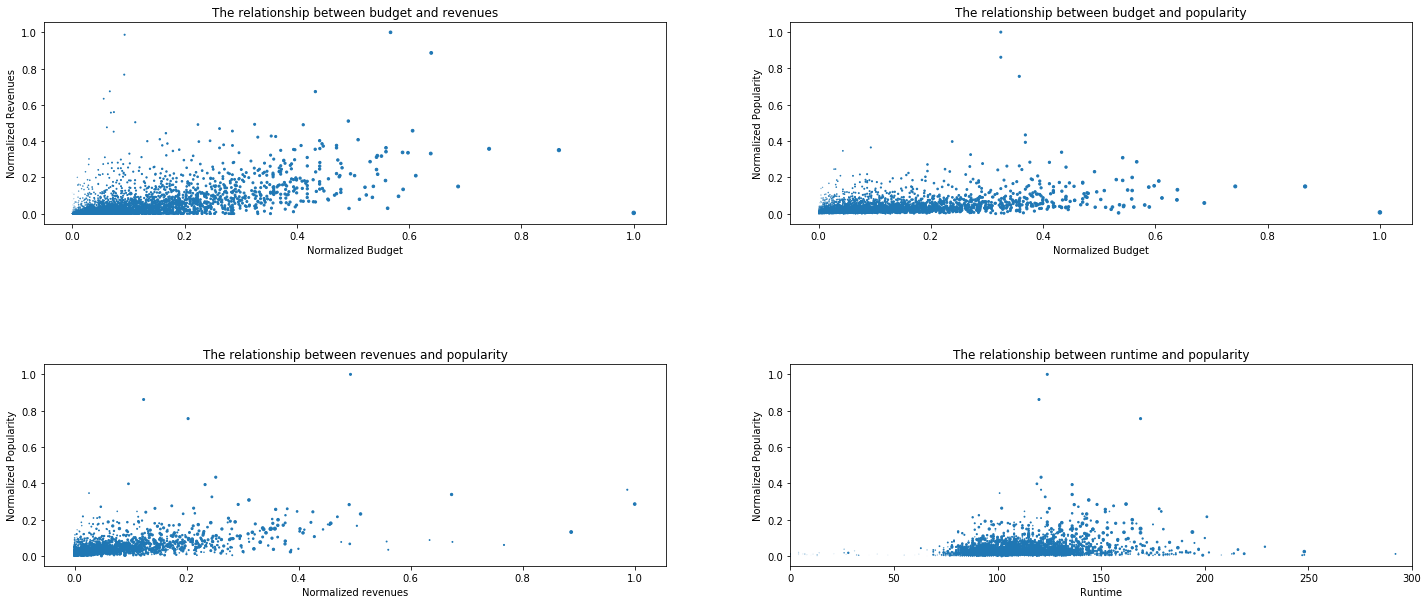

In [185]:
f = plt.subplots(2,2,figsize=(10,10))
plt.subplot(221)
plt.scatter(budget/budget.max(),revenues/revenues.max(),scaled_budget)
plt.xlabel('Normalized Budget')
plt.ylabel('Normalized Revenues')
plt.title('The relationship between budget and revenues')

plt.subplot(222)
plt.scatter(budget/budget.max(),popularity/popularity.max(),scaled_budget)
plt.xlabel('Normalized Budget')
plt.ylabel('Normalized Popularity')
plt.title('The relationship between budget and popularity')

plt.subplot(223)
plt.scatter(revenues/revenues.max(),popularity/popularity.max(),scaled_budget)
plt.xlabel('Normalized revenues')
plt.ylabel('Normalized Popularity')
plt.title('The relationship between revenues and popularity')

plt.subplot(224)
plt.scatter(runtime,popularity/popularity.max(),scaled_budget)
plt.xlim(0,300)
plt.xlabel('Runtime')
plt.ylabel('Normalized Popularity')
plt.title('The relationship between runtime and popularity')

plt.subplots_adjust(left=0.1,right=2.0,wspace=0.2,hspace = 0.7)
plt.show();

#### Answer:
- From the ploted figures above we can see that:
    - The budget and revenues has a positive relation, fairly weak, and possibly
linear.
    - For pupularity with budget, revenues or runtime, does not seem to be any relationship here.

### Q4:  What's the distribution of runtime?

In [186]:
# Query runtime which is less than 200mins, because normally the runtime will not exceed 3 hours
runtime = df_new.query('runtime <200').groupby('runtime').count()['id']
runtime.describe()

count    192.000000
mean      56.208333
std       91.841990
min        1.000000
25%        5.000000
50%        9.500000
75%       63.250000
max      547.000000
Name: id, dtype: float64

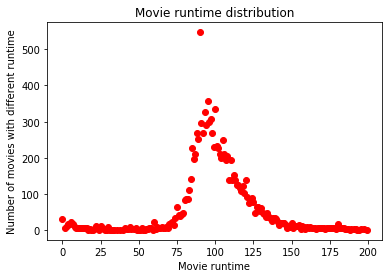

In [187]:
plt.plot(runtime,'ro')
plt.xlabel("Movie runtime")
plt.ylabel('Number of movies with different runtime')
plt.title('Movie runtime distribution')
plt.show()

#### Answer: 
- The average movie runtime from all calculated data is 56.208333 mins;
- The maximum movie runtime is 547 mins;
- Normally the movie runtime is within 90mins to 120mins.

### Q5: Who directed the most movies?

In [189]:
director = df_new.groupby('director').count()['id']
print (director.max())
print (director.idxmax())
print ('{} is the one who has directed the most movies ({} movies)'.format(director.idxmax(),director.max()) )

45
Woody Allen
Woody Allen is the one who has directed the most movies (45 movies)


#### Answer:
- Woody Allen has directed the most movies from year to year, and the total number is 45 movies.

### Q6: Which genres are most popular from year to year? 

In [190]:
# Get the genres from the file
genres = df_new['genres']
# Count each kind of genres and store them in a dictionary
statistics = {}
for types in genres:
    for type in types:
        if type not in statistics:
            statistics[type] = 1
        else:
            statistics[type] += 1
print(statistics)

{'Action': 2385, 'Adventure': 1471, 'Science Fiction': 1230, 'Thriller': 2908, 'Fantasy': 916, 'Crime': 1355, 'Western': 165, 'Drama': 4761, 'Family': 1231, 'Animation': 699, 'Comedy': 3793, 'Mystery': 810, 'Romance': 1712, 'War': 270, 'History': 334, 'Music': 408, 'Horror': 1637, 'Documentary': 520, 'TV Movie': 167, 'NaN': 23, 'Foreign': 188}


In [191]:
# Sort the dictionary by value
sorted_statistics = sorted(statistics.items(), key=lambda value: value[1])

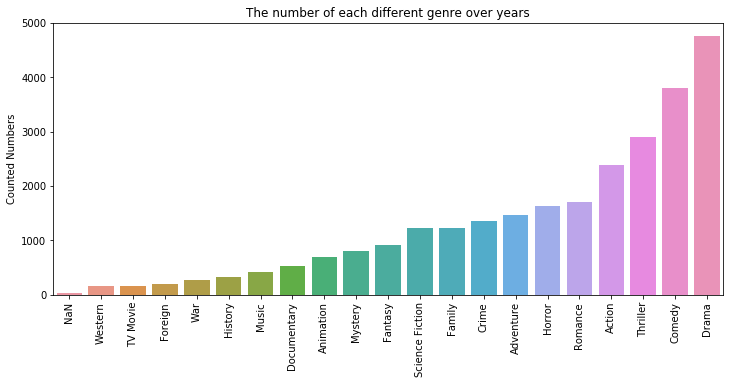

In [192]:
# Plot the genres
fig = plt.subplots(figsize=(12,5))
genre = [x[0] for x in sorted_statistics]
counts = [x[1] for x in sorted_statistics]
fig = sns.barplot(genre, counts)
plt.xticks(rotation=90)
plt.ylabel("Counted Numbers")
plt.title("The number of each different genre over years")
plt.show();

####  Answer:
- From the figure above we can see that the most popular genre is **_Drama_** from year to year, which totally has **2377**;
- The top 4 genres are **_Drama, Comedy, Thriller and Action_**.
- The most unpopular genre is **_TV Movie_**, which only has **162**.

### Q7: Which genres are associated with movie that has the highest revenues?

In [193]:
# Get revenue data
revenue = df_new['revenue_adj']
# Get the general description of revenue
revenue.describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [196]:
# Get the corresponded genres of movie with highest revenues
genres[revenue.idxmax()]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

#### Answer:
- The movie with highest revenues is belong to action, adventure, fantasy, or science fiction movie.

<a id='conclusions'></a>
## Conclusions
In this project, first I do a data narrowing where I generate a new csv file to store data which I am interested in, and then I cleaning NaN cells and use the query funtion to ignore unrealistic values (values that occur after the current year).
Through the whole data exploration with the movie database, I figure out that the production of the movie increases from year by year and the highest production appeared in 2014 with 682 movies. And normally the movies are released bewteen September and October, with runtime controled within 90 to 120 minutes. The top 4 popular genres are Drama, Comedy, Thriller and Action where the 2377 movies are drama while TV Movie shows the most unpopular genre.
There is a fairly weak, possibly linear and positive relationship between budget and revenues while it doesn't seem to be any relationship appear between popularity with runtime, revenues or budget.